# Unit 1

In [79]:
# Define path for files
path = r"C:\Users\cramb\OneDrive\Desktop\Bootcamp25\Images\\"

## Limits

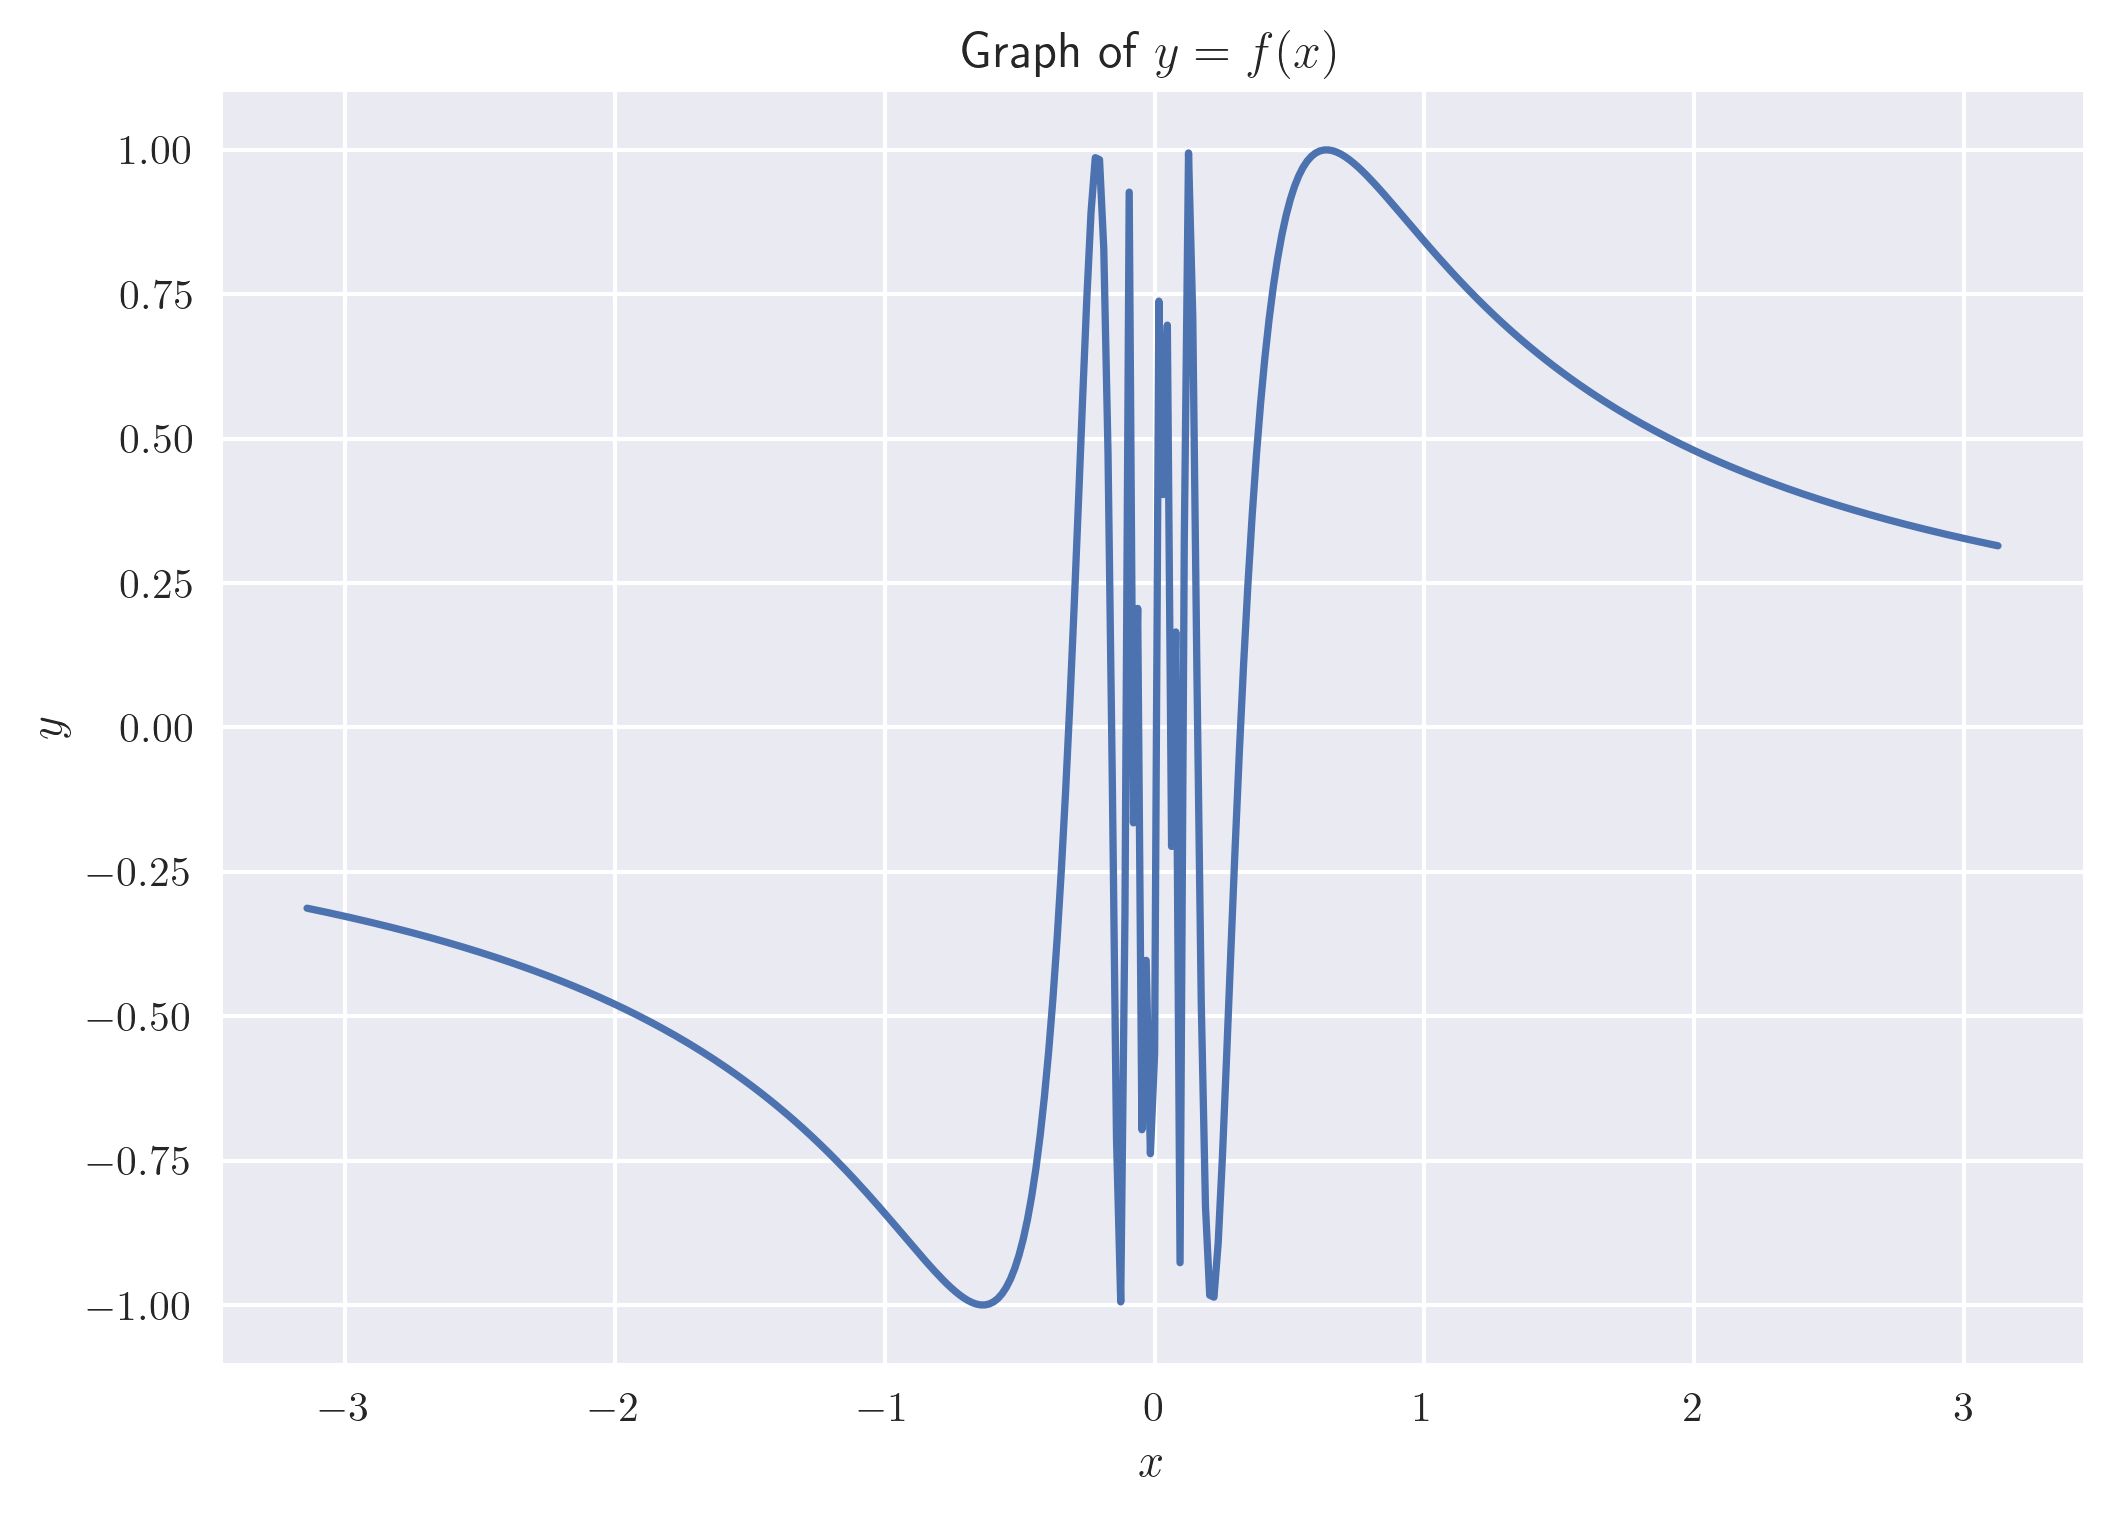

In [64]:
# Import modules 
import numpy as np
import matplotlib.pyplot as plt

# Use LaTex and increase image resolution
plt.rcParams['text.usetex'] = True
plt.rcParams['figure.dpi'] = 300

# Use Seaborn style
plt.style.use('seaborn-v0_8')

# Define f
f = lambda x: 0 if x == 0 else np.sin(1/x) 

# Let's graph on the interval [-pi, pi)
x_vals = np.arange(-np.pi, np.pi, np.pi/200)

# Calculate the y-values
y_vals = [f(x) for x in x_vals]

# Generate the plot
plt.plot(x_vals, y_vals)

# Label the x-axis
plt.xlabel('$x$')

# Label the y-axis
plt.ylabel('$y$')

# Give the graph a title
plt.title('Graph of $y = f(x)$')

# Save the figure
plt.savefig(path + r'ex1-1.png')

# Display the plot
plt.show()    


In [5]:
import numpy as np

# Create function to find a delta, given epsilon, for lim_{x\to a} f(x) = L
def get_delta(f, a, L, epsilon, delta = 1, n_iter = 20):
    
    for _ in range(n_iter):
        
        # Get points within delta distance of a
        x_vals = np.linspace(a - delta, a + delta, 100)

        # Remove a - delta, a, and a + delta since 0 < |x - a| < delta
        x_vals = x_vals[~np.isin(x_vals, [a - delta, a, a + delta])]

        # Get y-values; not assuming f is vectorized
        y_vals = np.array([f(x) for x in x_vals])

        # Check to see if any outside of epsilon distance of L
        if np.max(np.abs(y_vals - L)) > epsilon:

            # If there are, then half delta
            delta *= 0.5

        # If not, return delta
        else:
            return delta

    # If no value after n_iter iterations, return np.nan to indicate no delta exists
    return np.nan

# Note: This function doesn't work perfectly because
# (1) We didn't try every x-value that satisifes 0 < |x - a| < delta, only 100 values
# (2) Because of floating point accuracy, we may not have actually removed a - delta and a
# (3) The process terminates after n_iter. If epsilon is very small that number of iterations may not be enough
# (4) Floating point accuracy will be a problem when handeling 
# np.linspace(a - delta, a + delta, 100, endpoint = False) for very small delta
# (5) Floating point accuracy will be a problem when handeling np.max(np.abs(y_vals - L)) > epsilon for very 
# small values of np.max(np.abs(y_vals - L)) or epsilon 
# There are probably other problems as well! The function get_delta is just to help explain the concept.

# Define f for example
f = lambda x: x**2 if x != 2 else 5

# In this case a is 2
a = 2

# In this case, the limit is 4
L = 4

# This gives the listed epsilon values
epsilon_vals = np.logspace(0, -3, num = 4)

# Find delta for each epsilon
for epsilon in epsilon_vals:

    # Get delta corresponding to epsilon
    delta = get_delta(f, a, L, epsilon)

    print(f'If 0 < |x - {a}| < {delta:.4f}, then |f(x) - {L}| < {epsilon:.4f}')

If 0 < |x - 2| < 0.1250, then |f(x) - 4| < 1.0000
If 0 < |x - 2| < 0.0156, then |f(x) - 4| < 0.1000
If 0 < |x - 2| < 0.0020, then |f(x) - 4| < 0.0100
If 0 < |x - 2| < 0.0002, then |f(x) - 4| < 0.0010


In [9]:
# Try get_delta for lim_{a -> 0} g(x) = 0.5, where g(x) = 0 for x < 0 and 1 otherwise

# Define f for example
g = lambda x: 0 if x < 0 else 1

# In this case a is 2
a = 0

# In this case, the limit is 0.5
L = 0.5

# This gives the listed epsilon values
epsilon_vals = np.logspace(0, -3, num = 4)

# Find delta for each epsilon
for epsilon in epsilon_vals:

    # Get delta corresponding to epsilon
    delta = get_delta(g, a, L, epsilon)

    print(f'If 0 < |x - {a}| < {delta:.4f}, then |g(x) - {L}| < {epsilon:.4f}')

If 0 < |x - 0| < 1.0000, then |g(x) - 0.5| < 1.0000
If 0 < |x - 0| < nan, then |g(x) - 0.5| < 0.1000
If 0 < |x - 0| < nan, then |g(x) - 0.5| < 0.0100
If 0 < |x - 0| < nan, then |g(x) - 0.5| < 0.0010


## Derivatives

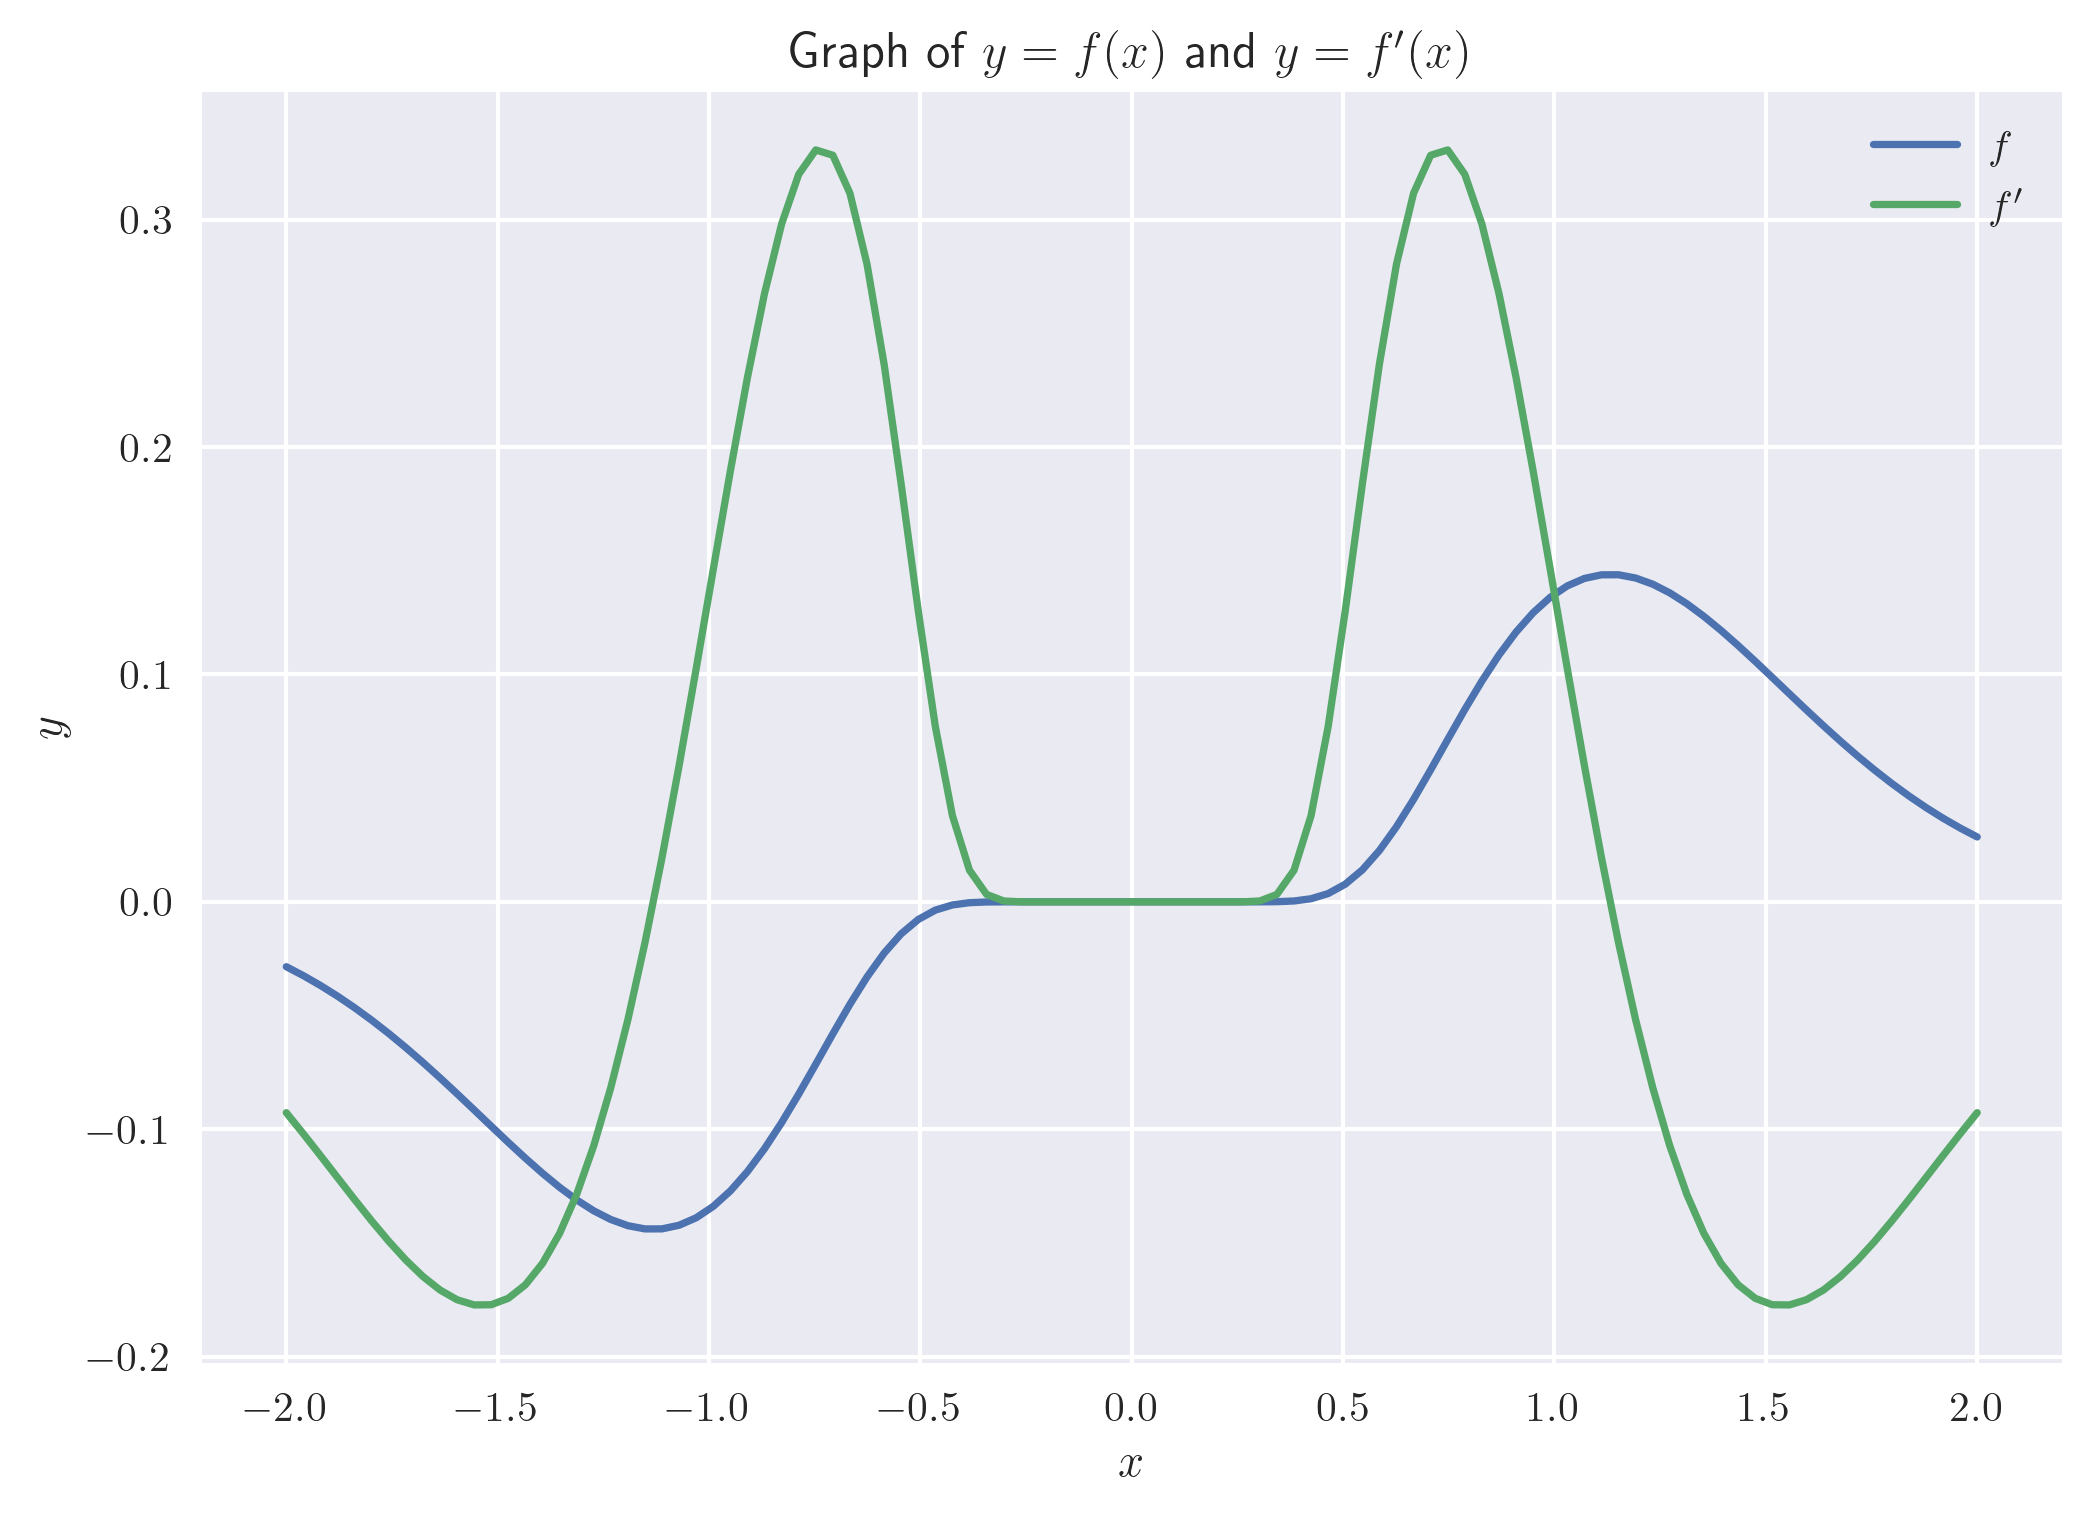

In [67]:
# Import modules 
import numpy as np
import matplotlib.pyplot as plt

# Use LaTex and increase image resolution
plt.rcParams['text.usetex'] = True
plt.rcParams['figure.dpi'] = 300

# Use Seaborn style
plt.style.use('seaborn-v0_8')

# Define f
f = lambda x: x * np.exp(-x**2 - x**-2) if x != 0 else 0

# Define h
h = 0.001

# Use numerical approximation
f_prime = lambda x: (f(x + h) - f(x - h))/(2 * h)

# Get the x-values
x_vals = np.linspace(-2, 2, 100)

# Get the two sets of y-values
y1_vals = [f(x) for x in x_vals]
y2_vals = [f_prime(x) for x in x_vals]

# Generate the plot for f
plt.plot(x_vals, y1_vals, label = r"$f$")
         
# Generate the plot for f'
plt.plot(x_vals, y2_vals, label = r"$f'$")  
         
# Label the x-axis
plt.xlabel('$x$')
         
# Label the y-axis
plt.ylabel('$y$')
         
# Give the graph a title
plt.title("Graph of $y = f(x)$ and $y = f'(x)$")

# Create a legend
plt.legend()
         
# Save the figure
plt.savefig(path + r'ex1-2.png')
         
# Display the plot
plt.show()    

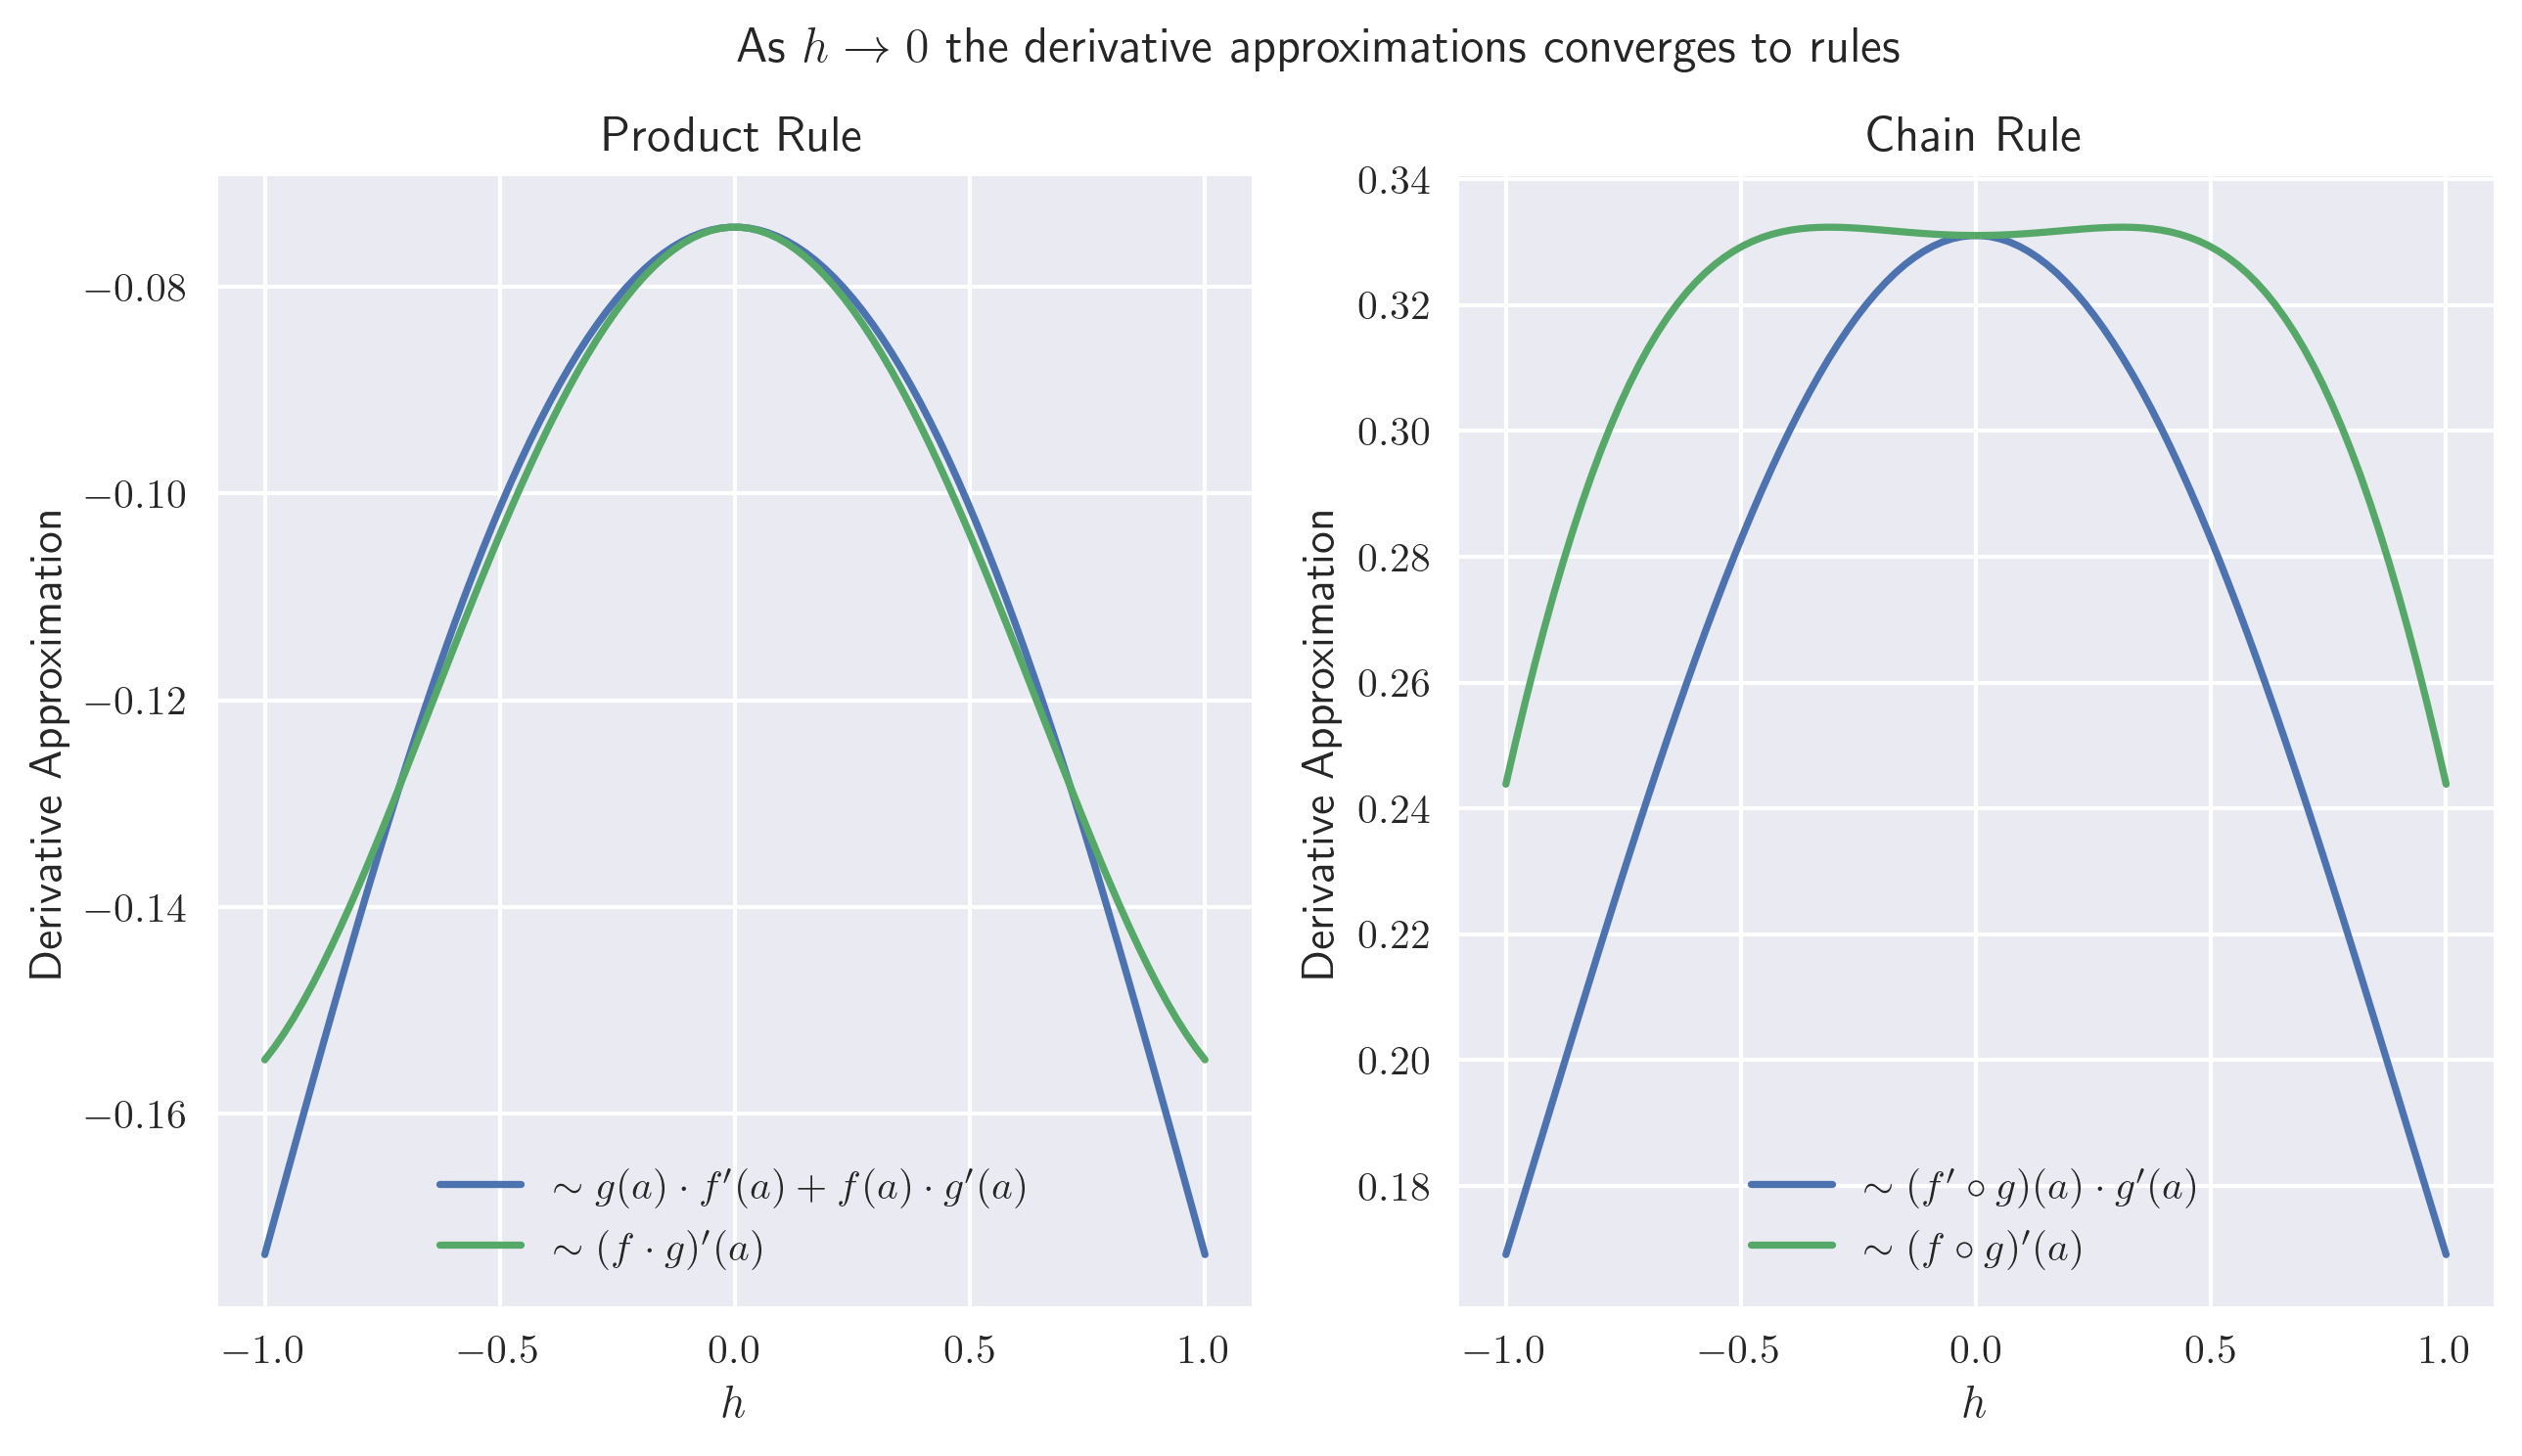

In [70]:
# Import modules 
import numpy as np
import matplotlib.pyplot as plt

# Use LaTex and increase image resolution
plt.rcParams['text.usetex'] = True
plt.rcParams['figure.dpi'] = 300

# Use Seaborn style
plt.style.use('seaborn-v0_8')

# Define f and g
f = lambda x: np.exp(-x**2)
g = lambda x: np.sin(x)

# Define product 
A = lambda x: f(x) * g(x)

# Define the composition
B = lambda x: f(g(x))

# Get derivative approximations
f_prime = lambda x, h: (f(x + h) - f(x - h))/(2 * h)
g_prime = lambda x, h: (g(x + h) - g(x - h))/(2 * h)
A_prime = lambda x, h: (A(x + h) - A(x - h))/(2 * h)
B_prime = lambda x, h: (B(x + h) - B(x - h))/(2 * h)

# Define product rule formula
product_rule = lambda x, h: g(x) * f_prime(x, h) + f(x) * g_prime(x, h)

# Define chain rule formula
chain_rule = lambda x, h: f_prime(g(x), h) * g_prime(x, h)

# Define small h-values
h_vals = np.linspace(-1, 1, 100)

# Let's consider the derivatives at a = 2
a = 2

# Evaluate complex functions at h-values; functions vectorized
A_prime_approx = A_prime(a, h_vals)
B_prime_approx = B_prime(a, h_vals)

# Evaluate rules at h-values; functions vectorized
product_rule_approx = product_rule(a, h_vals)
chain_rule_approx = chain_rule(a, h_vals)


# Create subplots
fig, ax = plt.subplots(1, 2, figsize = (10, 5))

# Product rule stuff 

# Graph results
ax[0].plot(h_vals, product_rule_approx, label = r"$\sim{g(a)\cdot f'(a) + f(a)\cdot g'(a)}$")
ax[0].plot(h_vals, A_prime_approx, label = r"$\sim{(f\cdot g)'(a)}$")

# Add legend
ax[0].legend()

# Label the h-axis
ax[0].set_xlabel('$h$')
         
# Label the y-axis
ax[0].set_ylabel('Derivative Approximation')

# Give subplot a title
ax[0].set_title('Product Rule')

# Chain rule stuff

# Graph results
ax[1].plot(h_vals, chain_rule_approx, label = r"$\sim{ (f'\circ g)(a)\cdot g'(a)}$")
ax[1].plot(h_vals, B_prime_approx, label = r"$\sim{(f\circ g)'(a)}$")

# Add legend
ax[1].legend()

# Label the h-axis
ax[1].set_xlabel('$h$')
         
# Label the y-axis
ax[1].set_ylabel('Derivative Approximation')

# Give subplot a title
ax[1].set_title('Chain Rule')

# Give figure a title
plt.suptitle(r'As $h \rightarrow 0$ the derivative approximations converges to rules')

plt.show()


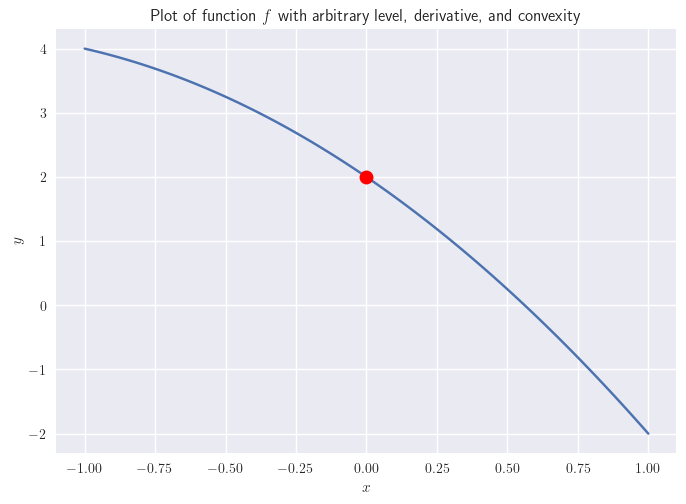

In [15]:
# Import modules 
import numpy as np
import matplotlib.pyplot as plt

# Use LaTex and increase image resolution
plt.rcParams['text.usetex'] = True

# Use Seaborn style
plt.style.use('seaborn-v0_8')

# We will define a function that has arbitrary level, derivative, and convexity at x = 0

# Define level, derivative, and convexity
level, derivative, convexity = 2, -3, -2

# Define function
f = lambda x: level + derivative * x + 0.5 * convexity * x**2

# Get x-values
x_vals = np.linspace(-1, 1, 100)

# Get y-values; f is vectorized
y_vals = f(x_vals)

# Plot function
plt.plot(x_vals, y_vals)

# Plot point
plt.plot(0, level, 'ro', markersize = 10) 

# Give plot a title
plt.title('Plot of function $f$ with arbitrary level, derivative, and convexity')

# Add x- and y-axis labels
plt.xlabel('$x$')
plt.ylabel('$y$')

plt.show()


## Integration

In [65]:
# Import numpy
import numpy as np

# Define Riemann sum
def riemann_sum(f, P, pts):
    
    # Sort values
    P = np.sort(P)

    # Calculate Delta x
    dx_vals = np.diff(P) 

    # Define T
    if pts == 'left':

        # Skips the last value
        T = P[:-1]
        
    elif pts == 'right':

        # Skips the first value
        T = P[1:]
    elif pts == 'mid':

        # Average of left and right endpoint values
        T = (P[:-1] + P[1:])/2
        
    else:
        raise Exception('Currently only left, right, and midpoints are supported!')
        
    # Get area of rectangles; assumes f is vectorized
    rectangle_areas = f(T) * dx_vals
    
    # Return sum
    return np.sum(rectangle_areas)

# Import pandas
import pandas as pd

# Define function
f = lambda x: np.e**(-x**2/2)

# Define the n-values
n_vals = [10, 50, 100, 500, 1000]

# Define list to hold values
results = pd.DataFrame(index = n_vals, columns = ['left', 'mid', 'right'])

# Loop over values
for n in n_vals:
    
    # We can use np.linspace for a uniform partition
    partition = np.linspace(0, 10, n + 1)
    
    # Get left endpoint results
    results.loc[n, 'left'] = riemann_sum(f, partition, 'left')
    
    # Get midpoint results
    results.loc[n, 'mid'] = riemann_sum(f, partition, 'mid') 
 
    # Get right endpoint results
    results.loc[n, 'right'] = riemann_sum(f, partition, 'right')   

results

,left,mid,right
10,1.753314,1.253314,0.753314
50,1.353314,1.253314,1.153314
100,1.303314,1.253314,1.203314
500,1.263314,1.253314,1.243314
1000,1.258314,1.253314,1.248314


## Sequences and Series

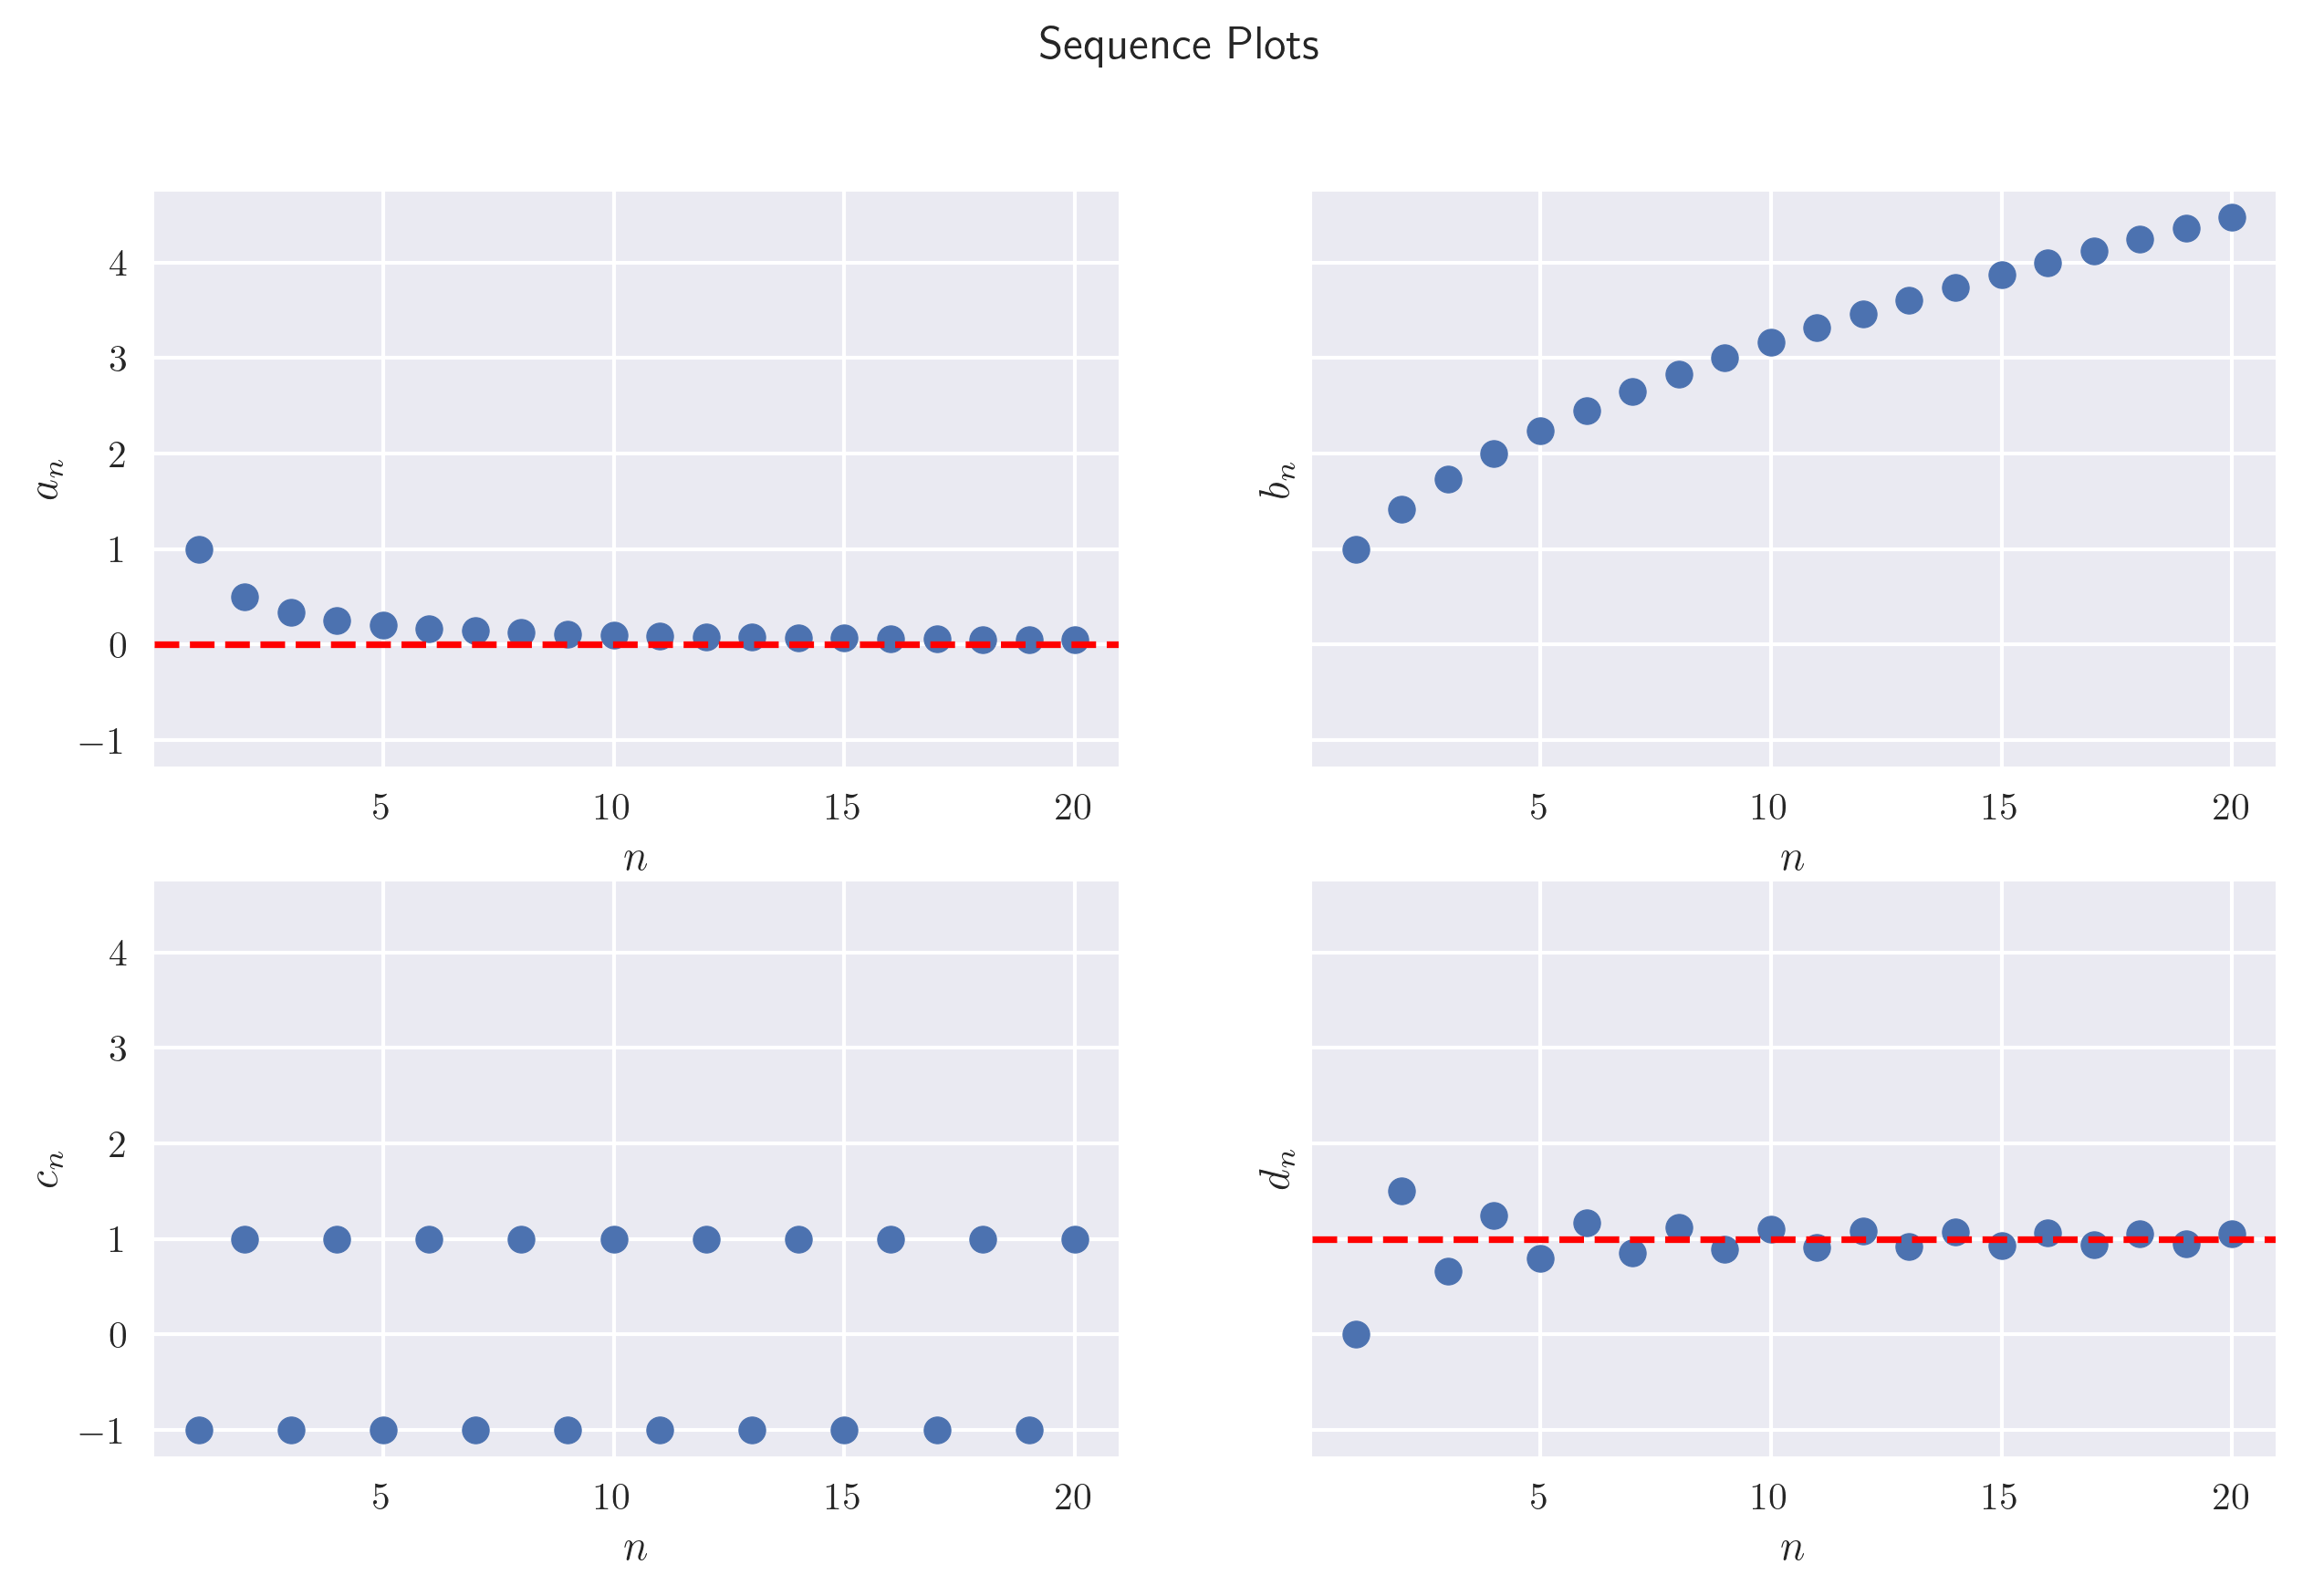

In [74]:
# Import modules 
import numpy as np
import matplotlib.pyplot as plt

# Use LaTeX and increase resolution
plt.rcParams['text.usetex'] = True
plt.rcParams['figure.dpi'] = 300

# Use Seaborn style
plt.style.use('seaborn-v0_8')

# Define functions
a = lambda n: 1/n
b = lambda n: np.sqrt(n)
c = lambda n: (-1)**n
d = lambda n: 1 + (-1)**n/n

# Define the limits
a_lim, d_lim = 0, 1

# Get the n-values
n_vals = np.arange(1, 21)

# Get the sequence values
# Functions already vectorized
a_vals = a(n_vals)
b_vals = b(n_vals)
c_vals = c(n_vals)
d_vals = d(n_vals)

# Set up subplots
fig, ax = plt.subplots(2, 2, sharey = True, figsize = (10, 6))

# Plot a_n and its limit
ax[0, 0].scatter(n_vals, a_vals)
ax[0, 0].axhline(y = a_lim, color = 'r', linestyle = 'dashed')
ax[0, 0].set_xlabel('$n$')
ax[0, 0].set_ylabel('$a_n$')

# Plot b_n and its limit
ax[0, 1].scatter(n_vals, b_vals, label = '$b_n$')
ax[0, 1].set_xlabel('$n$')
ax[0, 1].set_ylabel('$b_n$')

# Plot c_n and its limit
ax[1, 0].scatter(n_vals, c_vals)
ax[1, 0].set_xlabel('$n$')
ax[1, 0].set_ylabel('$c_n$')

# Plot d_n and its limit
ax[1, 1].scatter(n_vals, d_vals)
ax[1, 1].axhline(y = d_lim, color = 'r', linestyle = 'dashed')
ax[1, 1].set_xlabel('$n$')
ax[1, 1].set_ylabel('$d_n$')

plt.suptitle('Sequence Plots')

# Save the figure
plt.savefig(path + r'ex1-4.png')

plt.show()


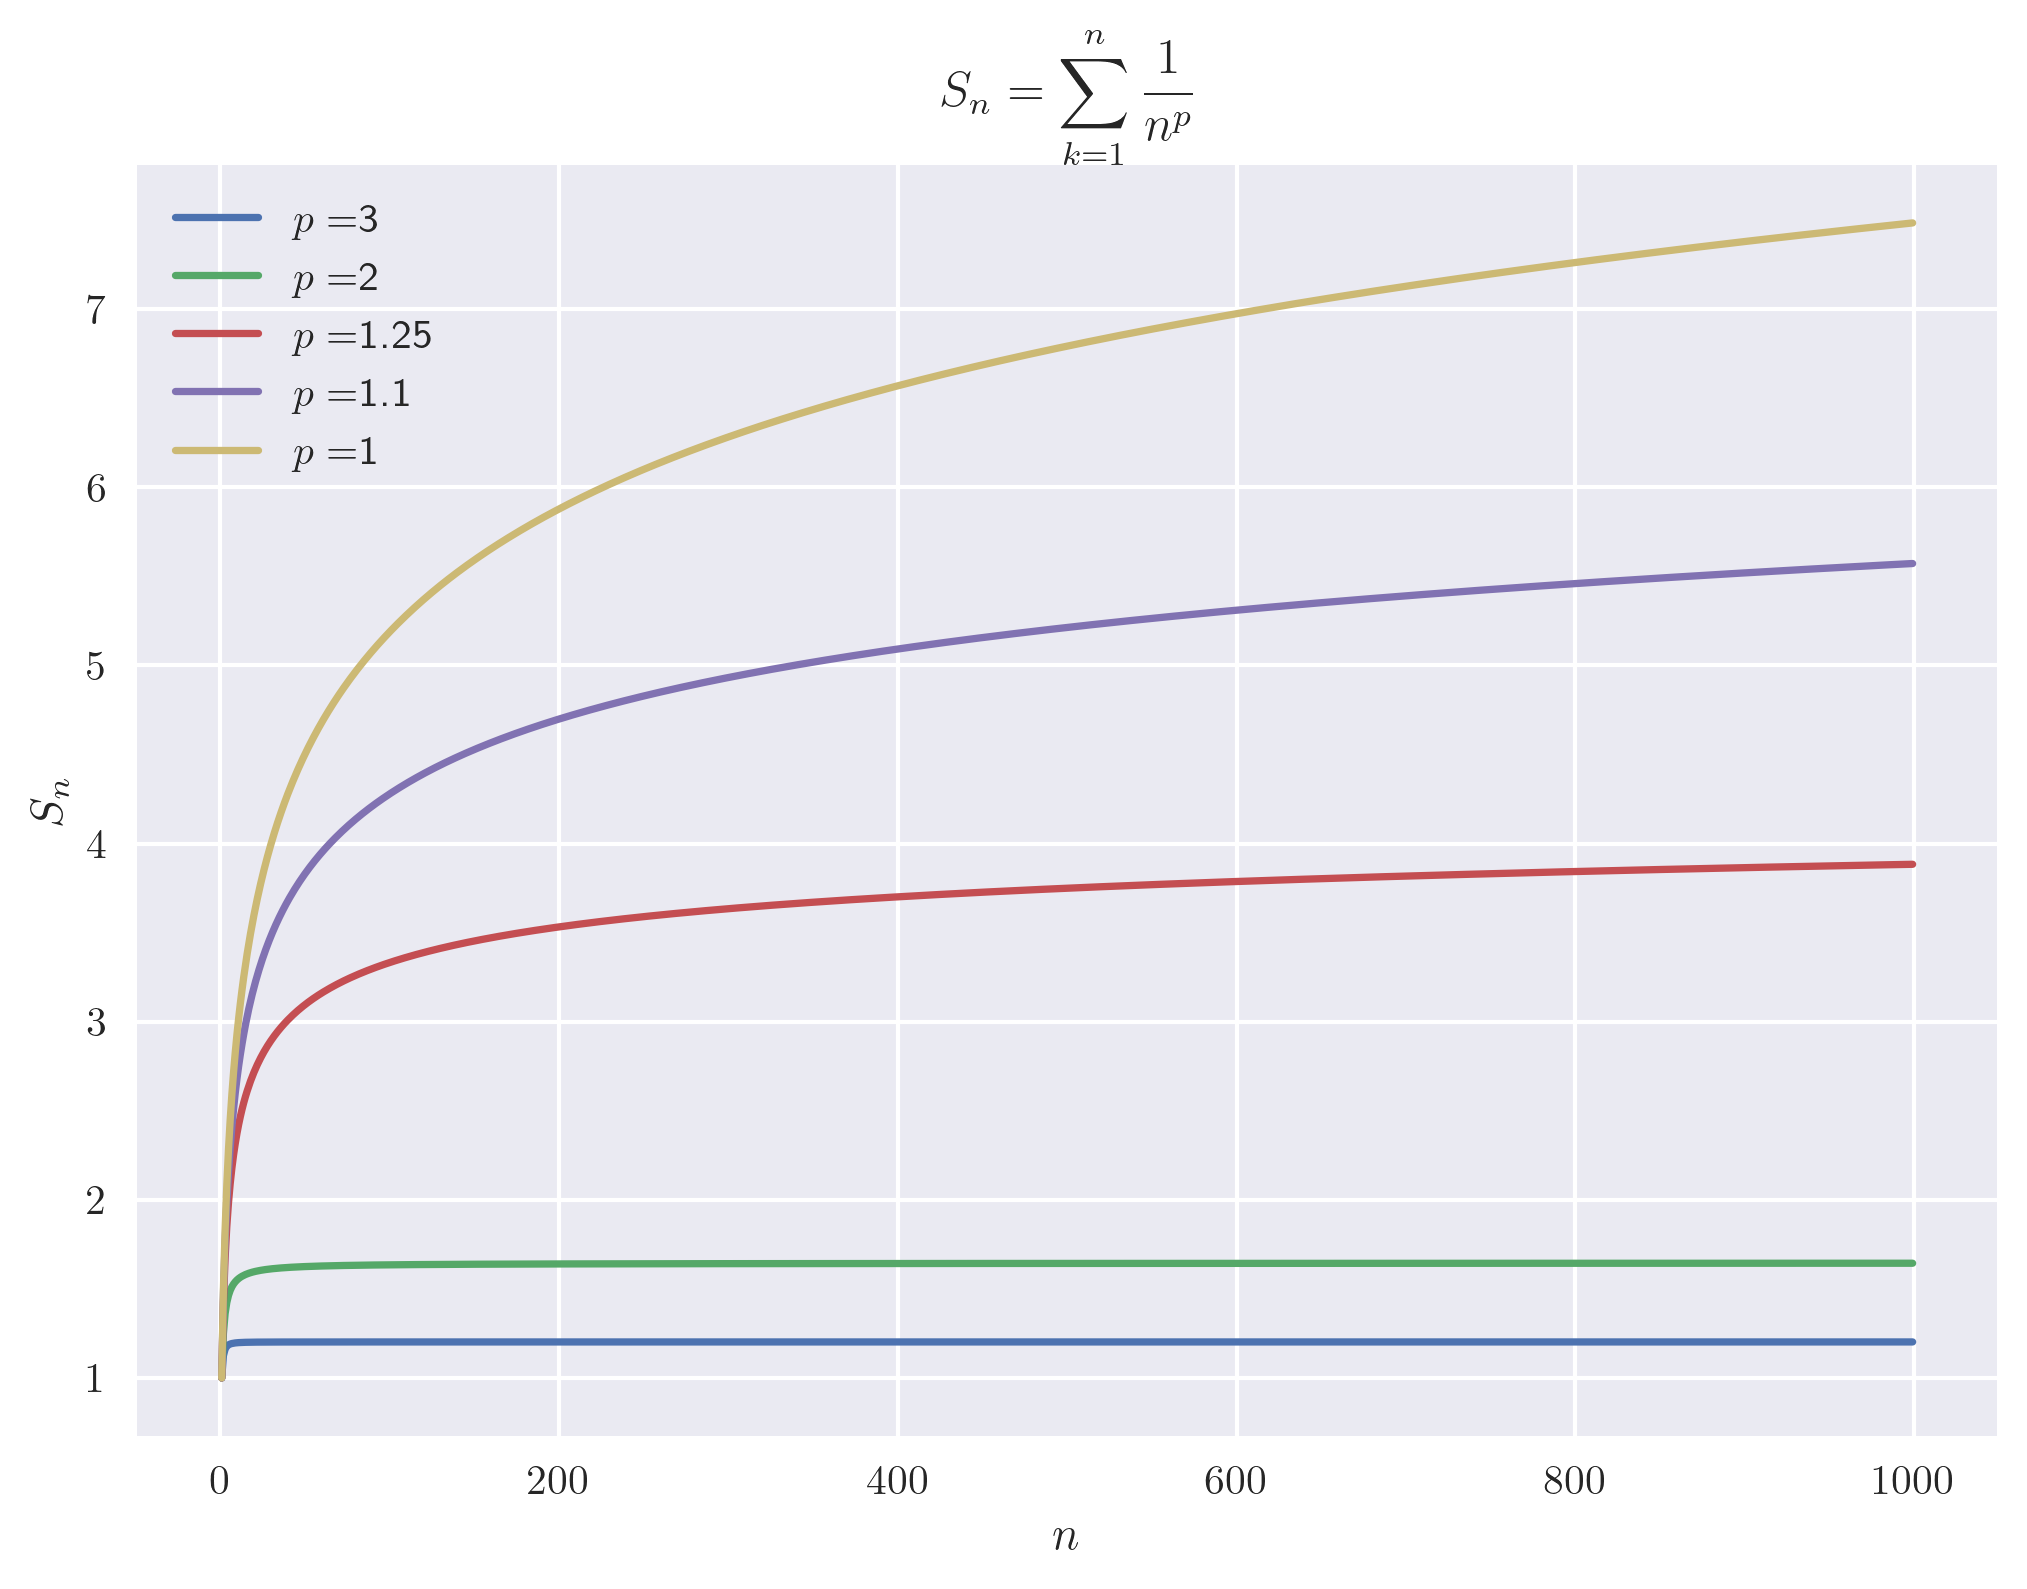

In [76]:
# Import modules 
import numpy as np
import matplotlib.pyplot as plt

# Use LaTeX and increase resolution
plt.rcParams['text.usetex'] = True
plt.rcParams['figure.dpi'] = 300

# Use Seaborn style
plt.style.use('seaborn-v0_8')

# Define p-values
p_vals = [3, 2, 1.25, 1.1, 1]

# Get n-values
n_vals = np.arange(1, 1_000, dtype = float)

# Loop over p-values
for p in p_vals:

    # Calculate terms of sum
    Sn = n_vals**(-p)

    # Take the cumulative sum
    Sn = np.cumsum(Sn)

    # Plot result
    plt.plot(n_vals, Sn, label = '$p = $' + str(p))

# Create x- and y-labels
plt.xlabel('$n$')
plt.ylabel('$S_n$')

# Add a legend
plt.legend()

# Add a title
plt.title(r'$S_n = \displaystyle\sum_{k = 1}^n \frac{1}{n^p}$')

# Save the figure
plt.savefig(path + r'ex1-5.png')

plt.show()

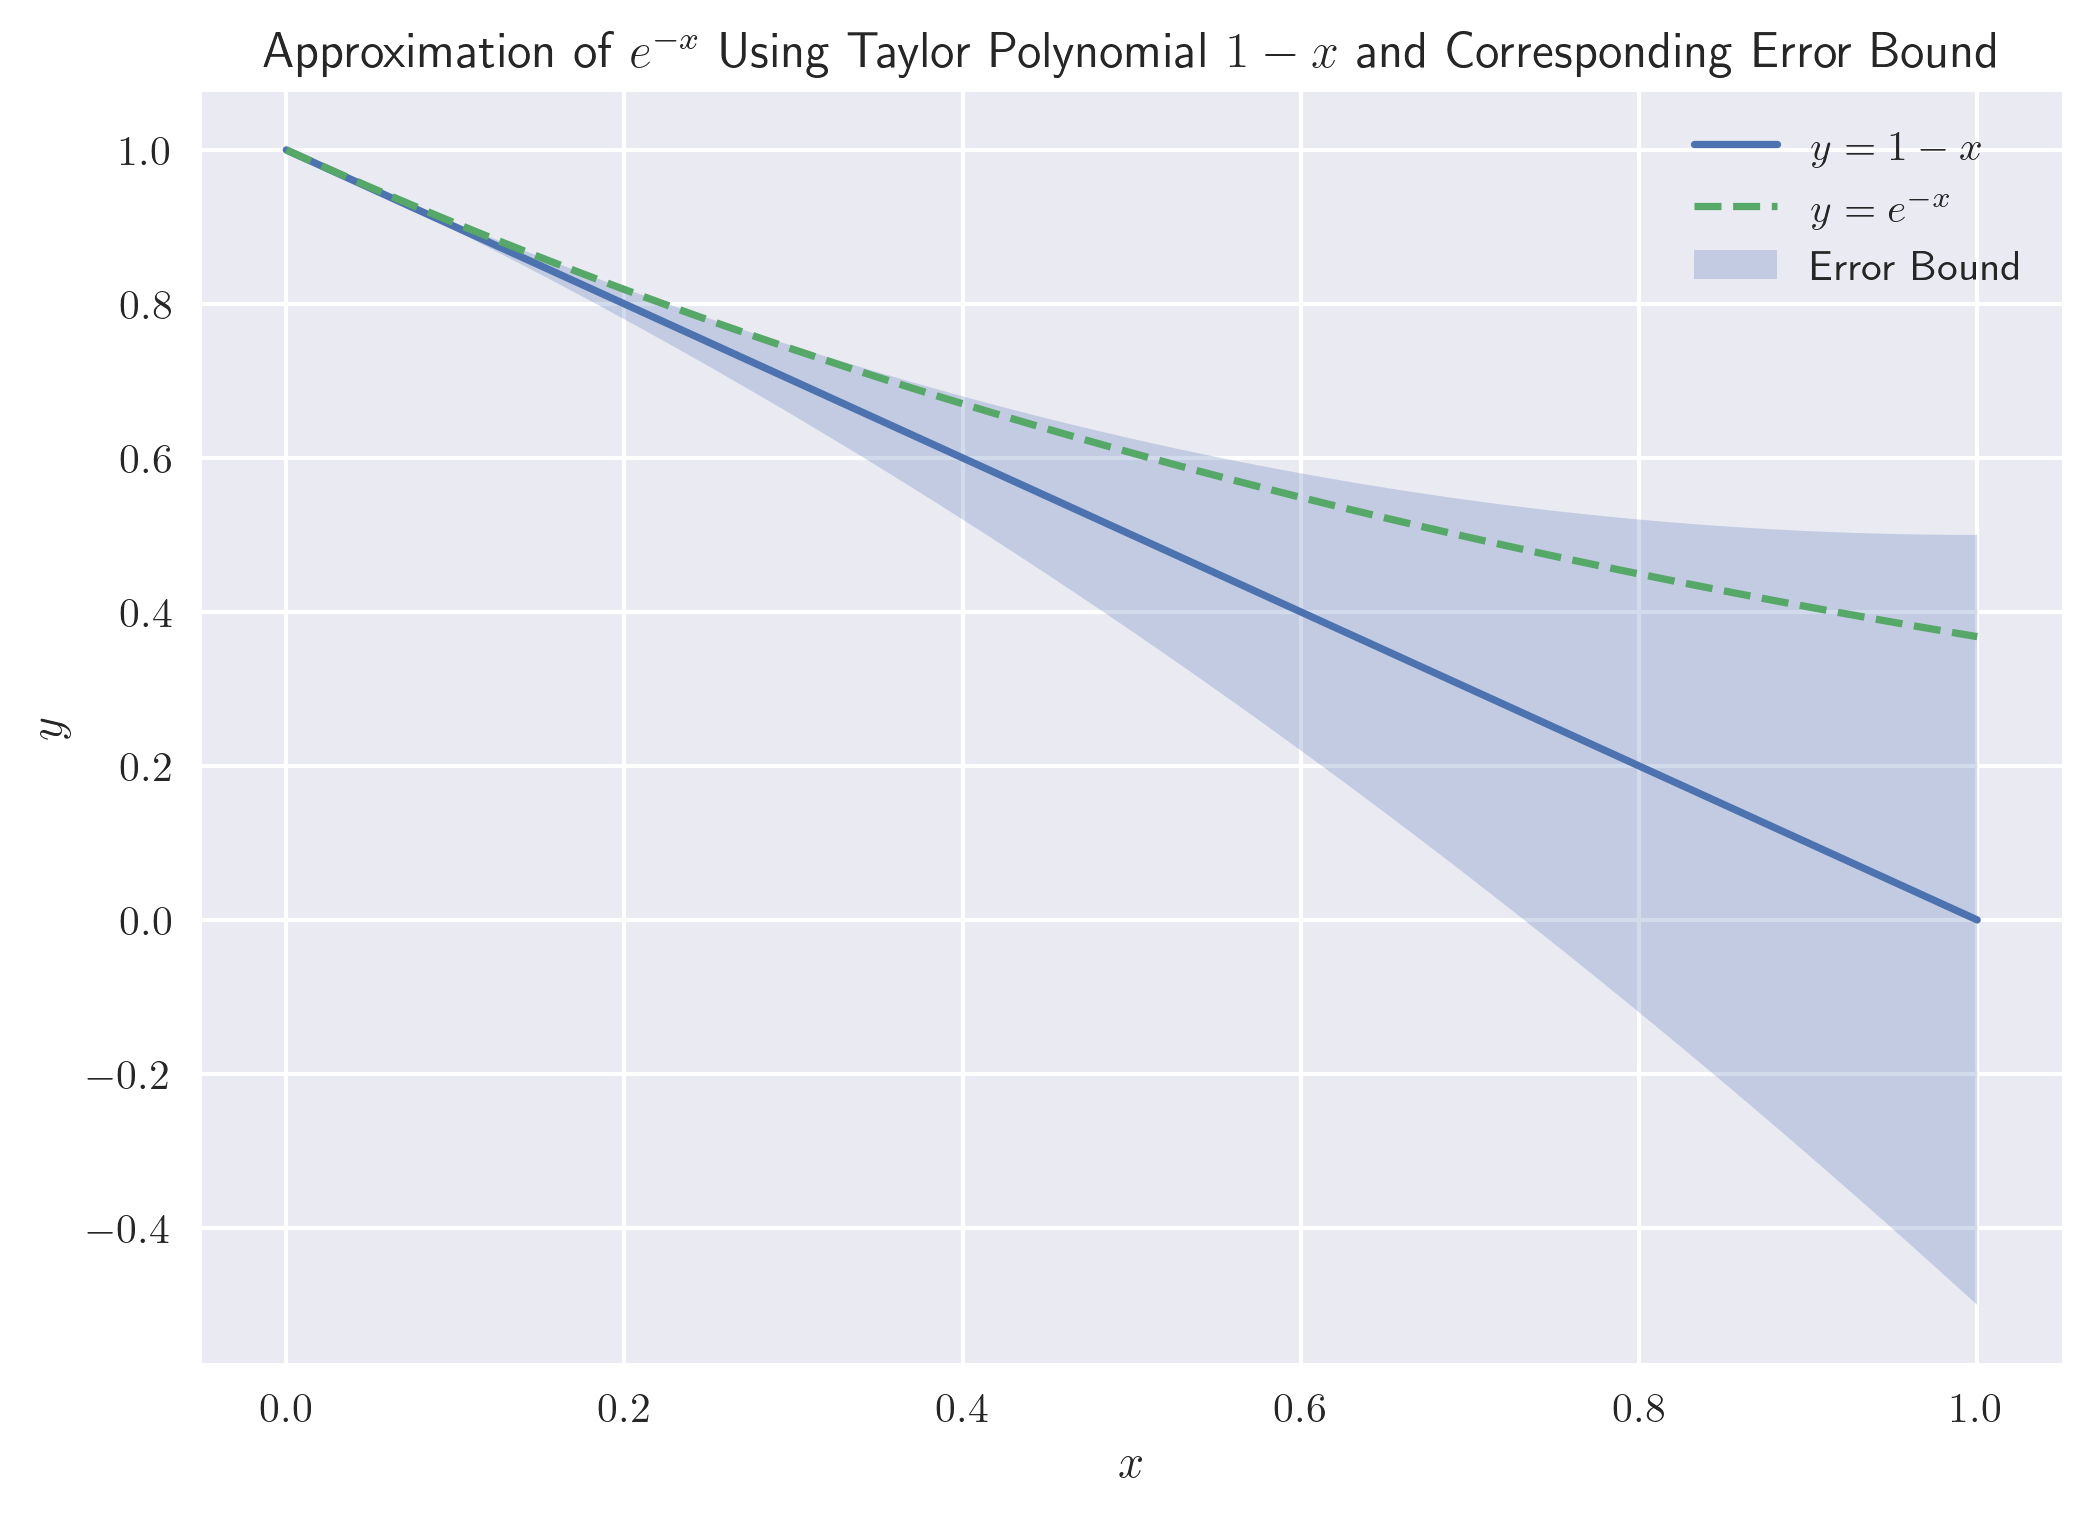

In [183]:
# Import modules 
import numpy as np
import matplotlib.pyplot as plt

# Use LaTeX and increase resolution
plt.rcParams['text.usetex'] = True
plt.rcParams['figure.dpi'] = 300

# Use Seaborn style
plt.style.use('seaborn-v0_8')

# Define Taylor polynomial
P = lambda x: 1 - x

# Get error function
error_fun = lambda x: 1/2 * np.abs(x)**2

# Get x-values
x_vals = np.linspace(0, 1, 100)

# Get y-values of approximation; P is vectorized
y_approx = P(x_vals)

# Get true y-values; np.exp is vectorized
y_true = np.exp(-1 * x_vals)

# Get the error; error_fun is vectorized
y_error = error_fun(x_vals)

# Plot graph of approximation
plt.plot(x_vals, y_approx, label = '$y = 1 - x$')

# Plot graph of truth
plt.plot(x_vals, y_true, linestyle = 'dashed', label = '$y = e^{-x}$')

# Plot the error bound
plt.fill_between(x_vals, y_approx - y_error, y_approx + y_error, label = 'Error Bound', alpha = 0.25)

# Create x- and y-labels
plt.xlabel('$x$')
plt.ylabel('$y$')

# Add legend
plt.legend()

# Add title
plt.title('Approximation of $e^{-x}$ Using Taylor Polynomial $1- x$ and Corresponding Error Bound')

# Save the figure
plt.savefig(path + r'ex1-6.png')

plt.show()


## Time Value of Money

In [138]:
# Import module
import numpy as np

# Record rate
rate = 0.05

# Record time of cash flows
time = np.array([0, 1, 2, 3, 4])

# Record cash flows
cash_flows = np.array([-100, 50, 20, 70, 10])

# Get the NPV
NPV = np.sum(cash_flows * np.exp(-rate * time))

print(f'The NPV of the cash flows is {NPV:.2f}.')

The NPV of the cash flows is 34.10.


In [150]:
# Import module
import numpy as np

# Payments at month t = 1, 2, 3, ..., 360
time = np.arange(1, 12 * 30 + 1, 1)

# The loan is 1 million
loan = 1_000_000

# The rate is compounded 12 times per year
rate = 0.12/12

# The payment is
payment = loan/np.sum((1 + rate)**(-time))

print(f"Jain's monthly payments would be {payment:.2f}.")

Jain's monthly payments would be 10286.13.


In [73]:
# Import module
import numpy as np

# Define rates
r = 0.08
g = 0.05

# Define initial payment
payment0 = 100

# Last payment at n = 10
n = 10

# Get payment times; arange doesn't include last value
time = np.arange(1, n  + 1)

# Calculate payments
payments = payment0 * (1 + g)**(time - 1)

# Calculate discount factors
discounts = 1/(1 + r)**time

# Calculate using direct method
NPV_direct = np.sum(payments * discounts)

# Calculate using formula
NPV_formula = payment0 * (1 - ((1 + g)/(1 + r))**n)/(r - g)

print(f"The NPV using the direct method is {NPV_direct:.2f}.")
print(f"The NPV using the formula is is {NPV_formula:.2f}.")
print(f"The difference between the results is {NPV_direct - NPV_formula:.5f}.")

The NPV using the direct method is 818.36.
The NPV using the formula is is 818.36.
The difference between the results is -0.00000.


# Options

In [75]:
# Import module
import numpy as np
from scipy.stats import norm

# Function to give the value of a European call option
def bs_call(S, K, T, r, sigma):

    # Calculate d_1 and d_2
    d_1 = (np.log(S/K) + (r + sigma**2/2) * T)/(sigma * np.sqrt(T))
    d_2 = d_1 - sigma * np.sqrt(T)

    # Calculate C
    C = S * norm.cdf(d_1) - K * np.exp(-r * T) * norm.cdf(d_2)

    return C

# Function to give the value of a European put option
def bs_put(S, K, T, r, sigma):

    # Get the price of a call
    C = bs_call(S, K, T, r, sigma)

    # Use put-call parity
    P = C - S + K * np.exp(-r * T)

    return P

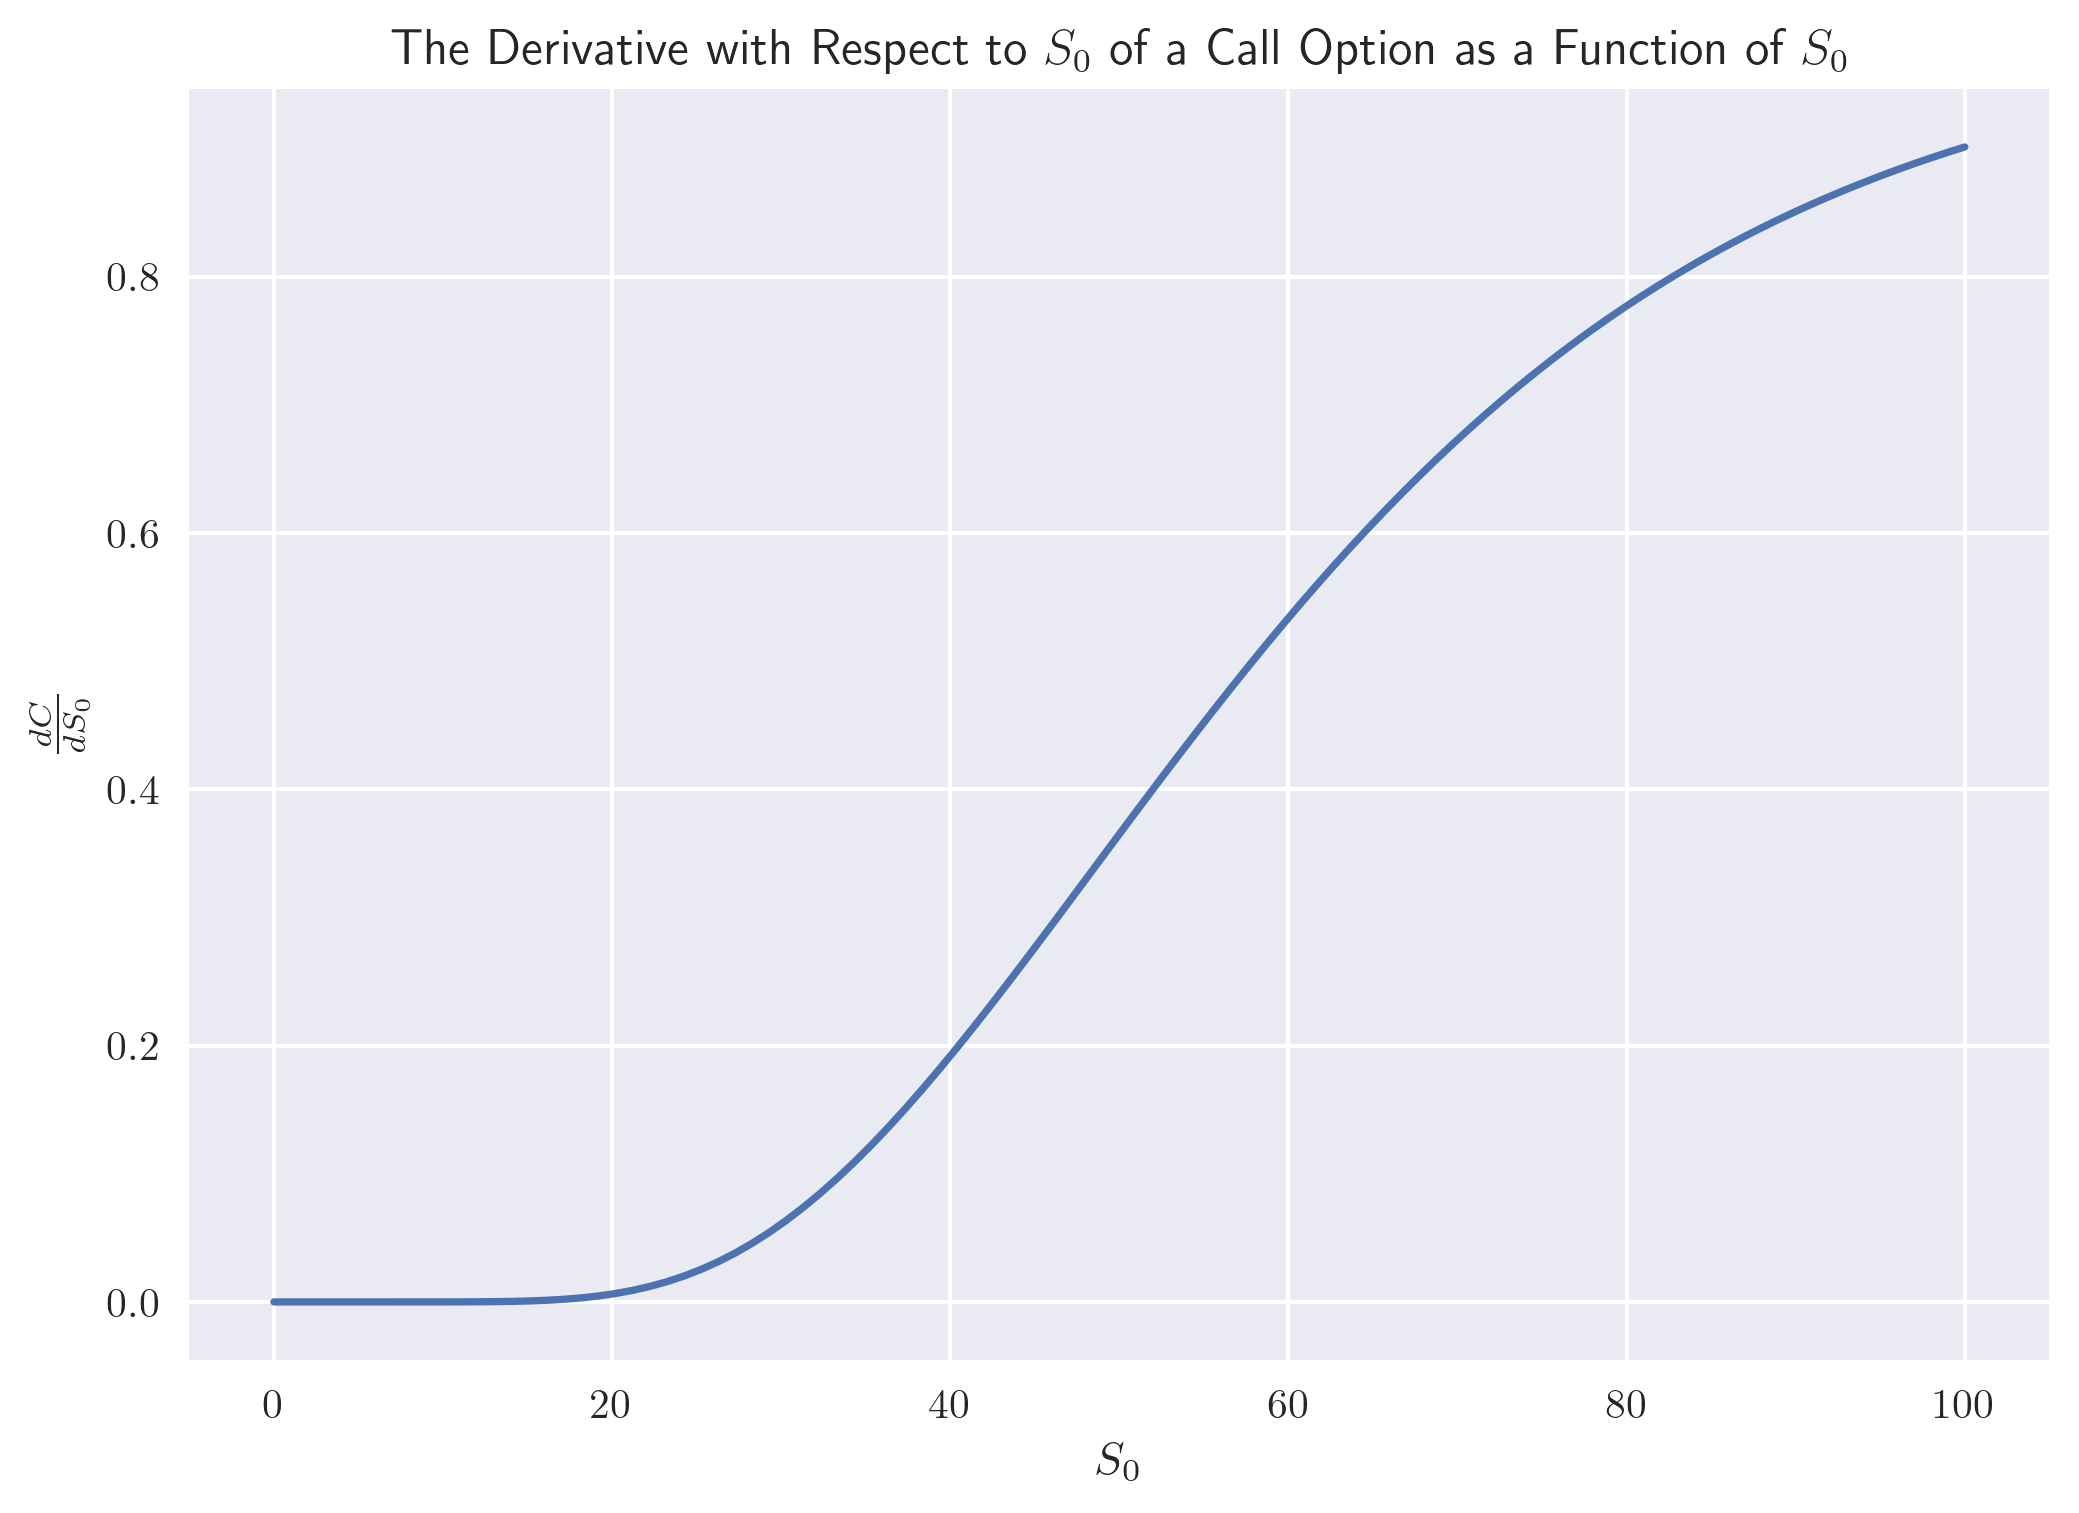

In [83]:
# Import PyPlot
import matplotlib.pyplot as plt

# Use LaTeX and increase resolution
plt.rcParams['text.usetex'], plt.rcParams['figure.dpi'] = True, 300

# Define h
h = 0.001

# Define Black-Scholes vars
K = 70
T = 2
r = 0.05
sigma = 0.30

# Calculate C'
C_prime = lambda S: (bs_call(S + h, K, T, r, sigma) - bs_call(S - h, K, T, r, sigma))/(2 * h)

# Define s-values
s_vals = np.linspace(1e-2, 100, 100)

# Calculate C_prime values; function vectorized
c_prime_vals = C_prime(s_vals)

# Plot relationship
plt.plot(s_vals, c_prime_vals)

# Give plot x- and y-labels
plt.xlabel('$S_0$')
plt.ylabel(r"$\frac{dC}{dS_0}$")

# Add a title
plt.title("The Derivative with Respect to $S_0$ of a Call Option as a Function of $S_0$")

# Save the figure
plt.savefig(path + r'ex1-7.png')

plt.show()